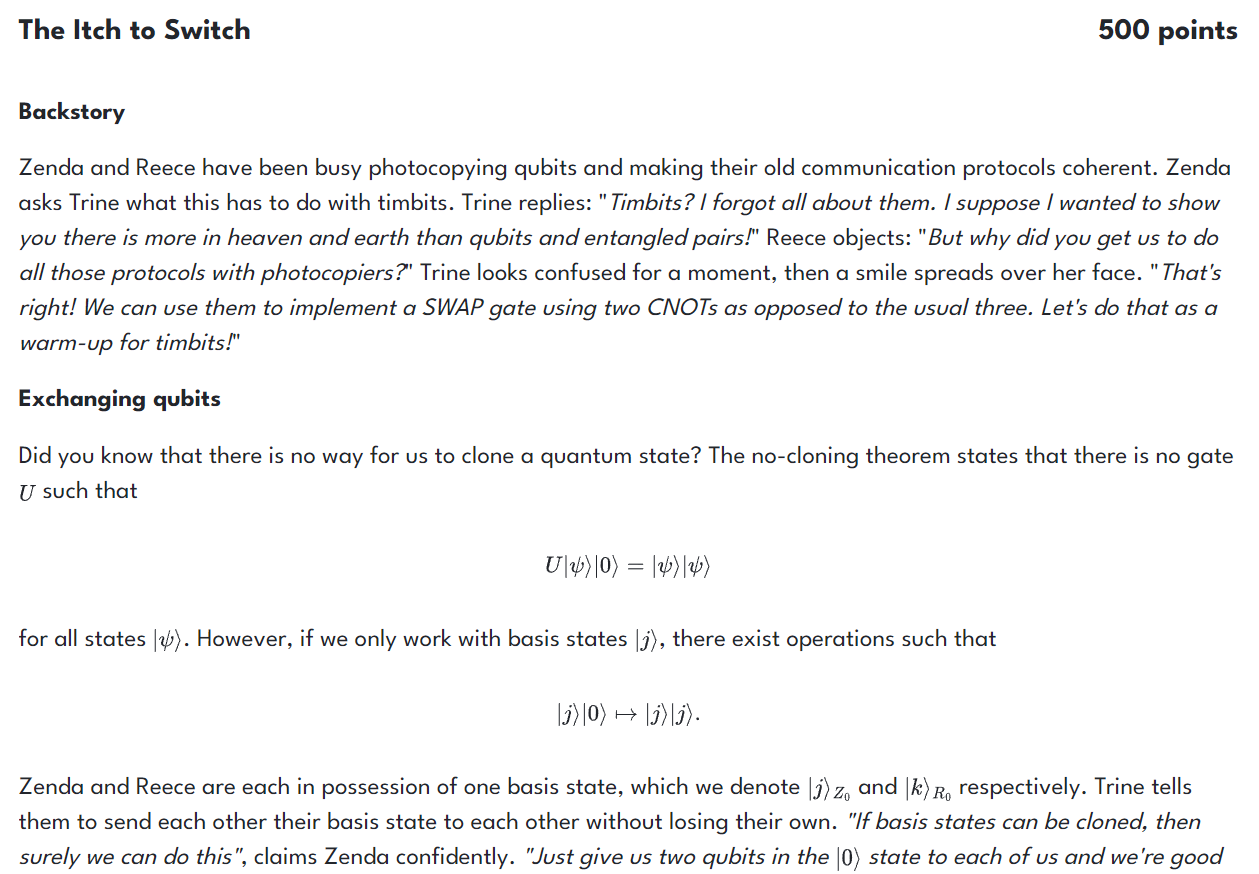

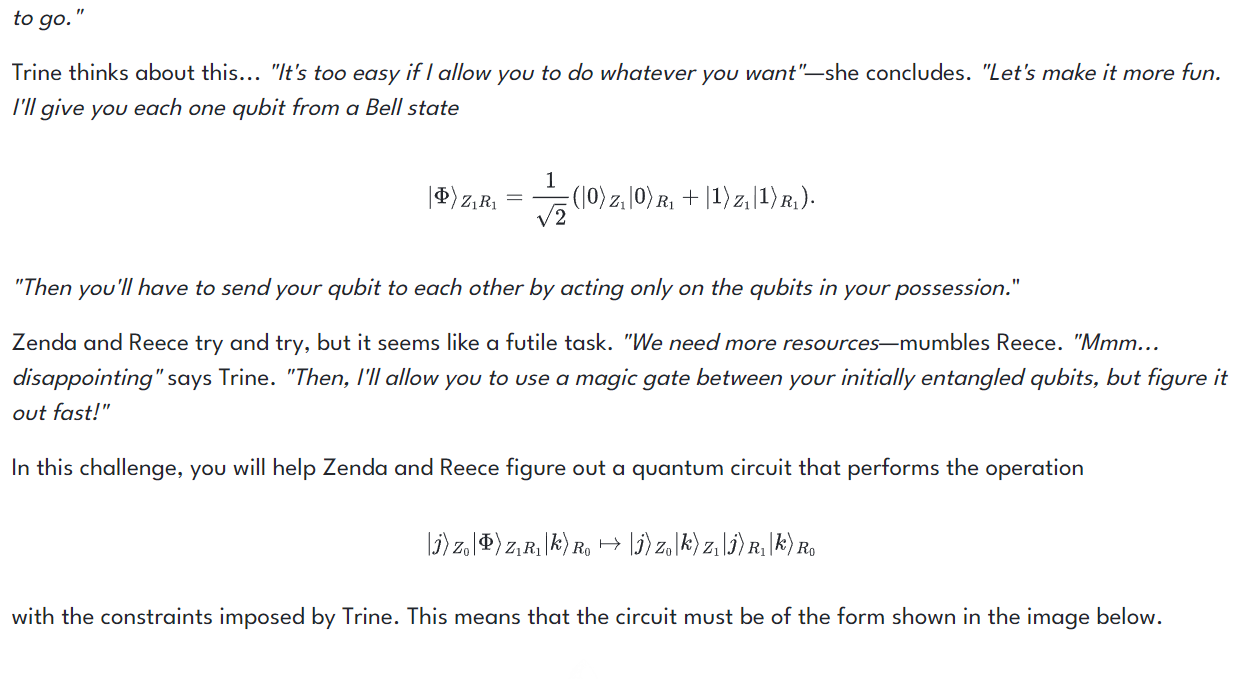

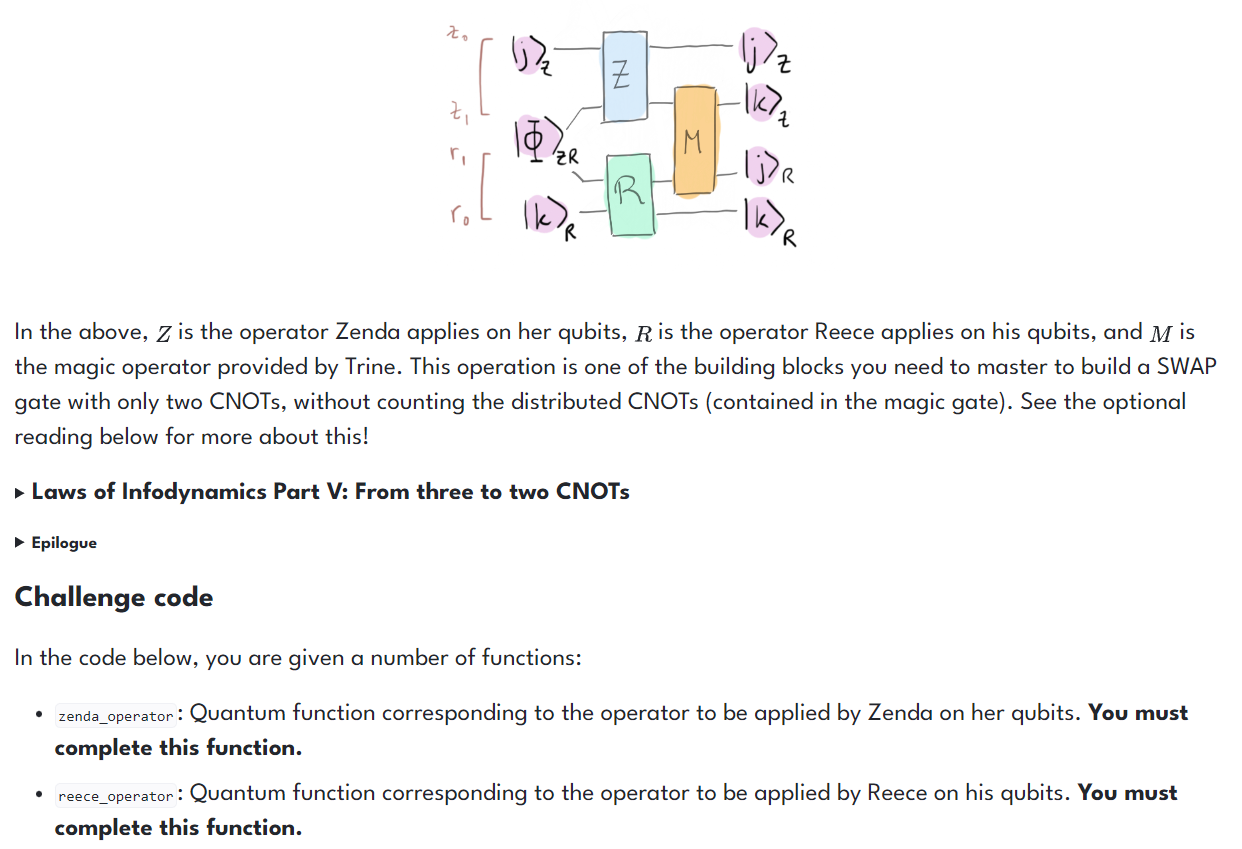

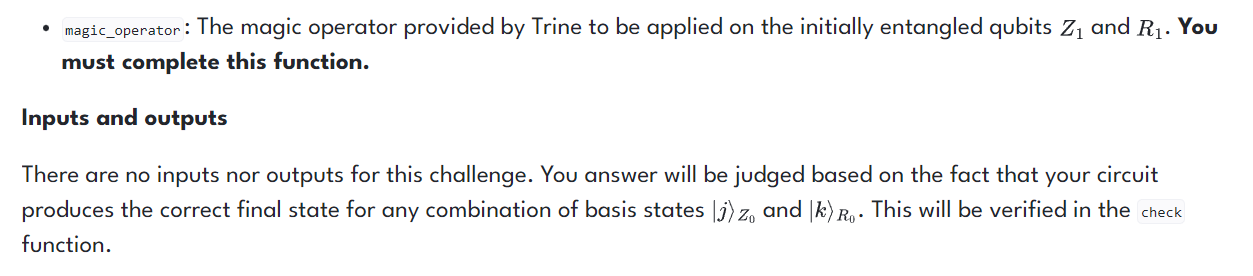

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np

def zenda_operator():
    """
    Quantum function corresponding to the operator to be applied by
    Zenda in her qubits.This function does not return anything, 
    you must simply write the necessary gates.
    """


    # Put your code here #


def reece_operator():
    """
    Quantum function corresponding to the operator to be applied by
    Reece in his qubits.This function does not return anything, 
    you must simply write the necessary gates.
    """


    # Put your code here #


def magic_operator():
    """
    Quantum function corresponding to the operator to be applied on the "z1"
    and "r1" qubits. This function does not return anything, you must
    simply write the necessary gates.

    """


    # Put your code here #


def bell_generator():
    """
    Quantum function preparing bell state shared by Reece and Zenda.
    """

    qml.Hadamard(wires=["z1"])
    qml.CNOT(wires=["z1", "r1"])


dev = qml.device("default.qubit", wires=["z0", "z1", "r1", "r0"])

@qml.qnode(dev)
def circuit(j, k):
    bell_generator()

    # j encoding and Zenda operation
    qml.BasisEmbedding([j], wires="z0")
    zenda_operator()

    # k encoding and Reece operation
    qml.BasisEmbedding([k], wires="r0")
    reece_operator()

    magic_operator()

    return qml.probs(wires=dev.wires)


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    return None


def check(solution_output: str, expected_output: str) -> None:

    try:
        dev1 = qml.device("default.qubit", wires = ["z0", "z1"])
        @qml.qnode(dev1)
        def circuit1():
            zenda_operator()
            return qml.probs(dev1.wires)
        circuit1()
    except:
        assert False, "zenda_operator can only act on z0 and z1 wires"

    try:
        dev2 = qml.device("default.qubit", wires = ["r0", "r1"])
        @qml.qnode(dev2)
        def circuit2():
            reece_operator()
            return qml.probs(dev2.wires)
        circuit2()
    except:
        assert False, "reece_operator can only act on r0 and r1 wires"
    try:
        dev3 = qml.device("default.qubit", wires = ["z1", "r1"])
        @qml.qnode(dev3)
        def circuit3():
            magic_operator()
            return qml.probs(dev3.wires)
        circuit3()
    except:
        assert False, "magic_operator can only act on r1 and z1 wires"


    for j in range(2):
        for k in range(2):
            assert np.isclose(circuit(j, k)[10 * j + 5 * k], 1), "The output is not correct"


test_cases = [['No input', 'No output']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")